In [ ]:
# import open3d as o3d
# import open3d.visualization.gui as gui
# import numpy as np

# app = gui.Application.instance
# app.initialize()

# vis = o3d.visualization.O3DVisualizer('point cloud', 800, 800)
# pcd = o3d.geometry.PointCloud()
# pcd.points = o3d.utility.Vector3dVector([[1, 2, 3]])
# vis.add_geometry('points', pcd)

# app.add_window(vis)
# app.run()

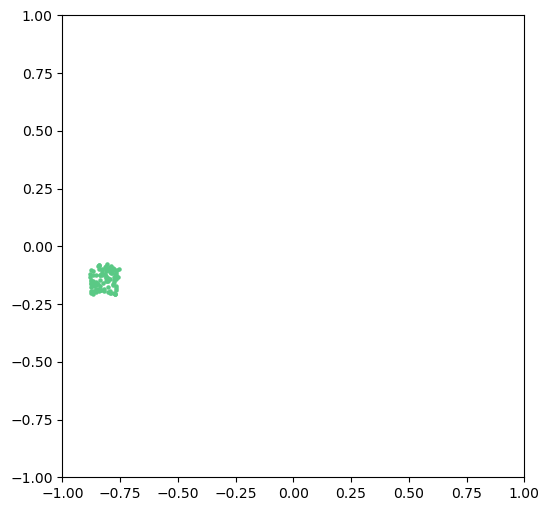

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

def generate_random_shape_points():
    # Randomly choose the shape type
    shape_type = random.choice(['circle', 'square', 'polygon'])
    
    # Random position (x, y)
    x, y = random.uniform(-1, 1), random.uniform(-1, 1)
    
    # Random size/scale factor
    size = random.uniform(0.05, 0.3)
    
    # Random color (RGB)
    color = np.random.rand(3,)
    
    if shape_type == 'circle':
        radius = size
        return generate_circle_points(x, y, radius, color)
    elif shape_type == 'square':
        side_length = size
        return generate_square_points(x, y, side_length, color)
    elif shape_type == 'polygon':
        num_sides = random.randint(3, 6)  # Random polygon between triangle and hexagon
        return generate_polygon_points(x, y, num_sides, size, color)

def generate_circle_points(x, y, radius, color, num_points=100):
    # Generate points inside the circle
    angles = np.linspace(0, 2 * np.pi, num_points)
    points = np.array([(x + radius * np.cos(angle), y + radius * np.sin(angle)) for angle in angles])
    
    # Create a filled shape by sampling points inside the circle
    num_fill_points = 1000  # Number of points to generate inside the circle
    angles_fill = np.random.uniform(0, 2 * np.pi, num_fill_points)
    radii_fill = np.sqrt(np.random.uniform(0, 1, num_fill_points)) * radius
    x_fill = x + radii_fill * np.cos(angles_fill)
    y_fill = y + radii_fill * np.sin(angles_fill)
    
    return np.column_stack((x_fill, y_fill)), color

def generate_square_points(x, y, side_length, color, num_points=100):
    # Generate points inside the square
    half_side = side_length / 2
    x_fill = np.random.uniform(x - half_side, x + half_side, num_points)
    y_fill = np.random.uniform(y - half_side, y + half_side, num_points)
    
    return np.column_stack((x_fill, y_fill)), color

def generate_polygon_points(x, y, num_sides, size, color, num_points=1000):
    # Generate points inside a polygon
    angles = np.linspace(0, 2 * np.pi, num_sides, endpoint=False)
    vertices = np.array([(x + size * np.cos(angle), y + size * np.sin(angle)) for angle in angles])
    
    # Generate points inside the polygon using a random point-in-polygon technique
    points = []
    for _ in range(num_points):
        # Randomly sample a point inside the bounding box
        rand_x = np.random.uniform(x - size, x + size)
        rand_y = np.random.uniform(y - size, y + size)
        # Check if the point is inside the polygon using a simple ray-casting algorithm
        if is_point_in_polygon(rand_x, rand_y, vertices):
            points.append([rand_x, rand_y])
    
    return np.array(points), color

def is_point_in_polygon(px, py, vertices):
    # Ray-casting algorithm to check if a point is inside a polygon
    n = len(vertices)
    inside = False
    x1, y1 = vertices[0]
    for i in range(n + 1):
        x2, y2 = vertices[i % n]
        if py > min(y1, y2):
            if py <= max(y1, y2):
                if px <= max(x1, x2):
                    if y1 != y2:
                        xinters = (py - y1) * (x2 - x1) / (y2 - y1) + x1
                    if x1 == x2 or px <= xinters:
                        inside = not inside
        x1, y1 = x2, y2
    return inside

# Create the plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_aspect('equal')

# Generate and draw filled random shape points
points, color = generate_random_shape_points()
ax.scatter(points[:, 0], points[:, 1], color=color, s=5)
plt.show()
